In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

Welcome to my COVID-19 tracker
Here are some of the examples of ISO code of some of the countries:

 1.Afghanistan-AF  2.Bangladesh-BD  3.India-IN  4.USA-US  5.UK-GB  6.Spain-ES
 7.Germany-DE  8.China-CN  9.Japan-JP  10.Canada-CA  11.Brazil-BR  12.France-FR
 13.Pakistan-PK  14.New Zealand-NZ  15.Russia-RU  16.South Africa-ZA

Enter the ISO or country code to know info of that particular country: IN

The statstics of India are
          date  confirmed  deaths  recovered
0  2020-01-22          0       0          0
1  2020-01-23          0       0          0
2  2020-01-24          0       0          0
3  2020-01-25          0       0          0
4  2020-01-26          0       0          0
..        ...        ...     ...        ...
92 2020-04-23      23502     722       5012
93 2020-04-24      24530     780       5498
94 2020-04-25      26496     825       5939
95 2020-04-26      27977     884       6523
96 2020-04-27      27977     884       6523

[97 rows x 4 columns]

The following are

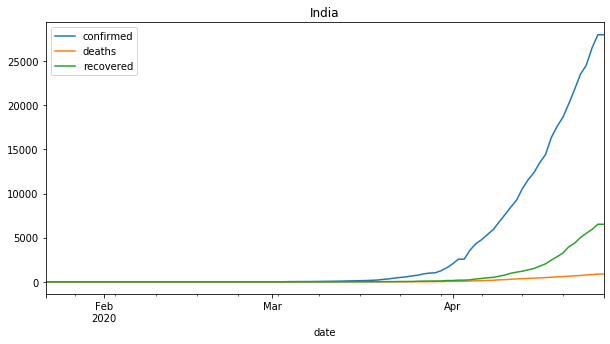

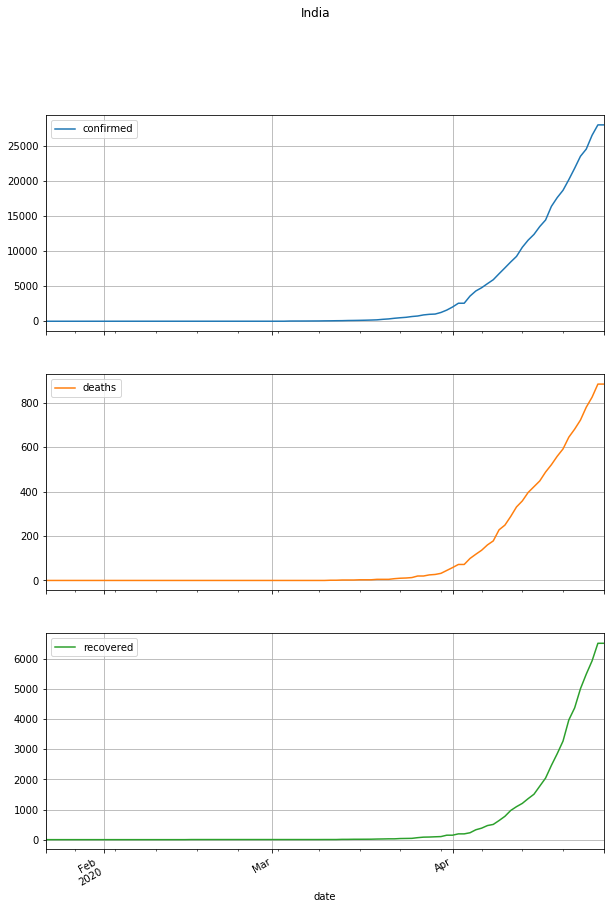

In [6]:
print("Welcome to my COVID-19 tracker")

print("Here are some of the examples of ISO code of some of the countries:\n")
print(" 1.Afghanistan-AF  2.Bangladesh-BD  3.India-IN  4.USA-US  5.UK-GB  6.Spain-ES\n 7.Germany-DE  8.China-CN  9.Japan-JP  10.Canada-CA  11.Brazil-BR  12.France-FR\n 13.Pakistan-PK  14.New Zealand-NZ  15.Russia-RU  16.South Africa-ZA")
    
## Needs the country's ISO code
iso = input("\nEnter the ISO or country code to know info of that particular country: ")

## The COVID-19 tracker function starts here
def covidtracker(iso):
    
    ## Requesting the data form the API
    def getstats(country):
        api_url = 'https://api.smartable.ai/coronavirus/stats/' + country
        api_params = {
            'Cache-Control' : 'no-cache',
            'Subscription-Key' : 'e29d0d2f695f4b99a98837a8a24a3fc8',
        }
        r = requests.get(url = api_url, params = api_params)
        return r.text
    
    ## Stores the data of the country to the variable named data
    data = getstats(iso)
    
    ## Here the data is read from the JSON format
    jsondata = json.loads(data)
    
    ## This assigns the country name from data to a variable name country
    country = jsondata['location']['countryOrRegion']
    
    ## This print the Whole statistical data of the country
    history = pd.DataFrame(jsondata['stats']['history'])
    
    history['date']=pd.to_datetime(history['date'])  ## This converts the string date format in the JSON file to python readable(Pandas dataframe)
    
    print("\nThe statstics of {} are\n {}".format(country,history))
    
    ## This prints the above statistical data to graph format
    print("\nThe following are the graphs plotted using the data of {}:\n".format(country))
    history.plot(figsize=(10,5), x='date', title=country)
    history.plot(figsize=(10,15), x='date', title=country, subplots=True, grid=True)
    plt.show()
    
covidtracker(iso)